# K-means single iteration
Stough, DIP

Demo on k means clustering. We generate a little data and then do a single
step of the EM scheme for clustering.

Finding objects in images:
- Color coherence
- Spatial coherence

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# For importing from alternative directory sources
import sys  
sys.path.insert(0, '../dip_utils')

# from matrix_utils import (arr_info,
#                           make_linmap)
# from vis_utils import (vis_rgb_cube,
#                        vis_hists,
#                        vis_pair,
#                        vis_surface)

from scipy.spatial.distance import cdist

K = 2
NUMPOINTS = 1000

In [2]:
# Let's generate 2d random data
X1 = np.random.randn(NUMPOINTS//2, 2)  # Unit normal (mean 0, var 1)
X2 = np.random.randn(NUMPOINTS//2, 2)

X2[:,0] = 5 + 2*X2[:,0]
X2[:,1] = 3 + 2*X2[:,1]  # X2 data should be mean (5,3) var 4

X = np.concatenate([X1, X2], axis=0)

### Look at the generated data

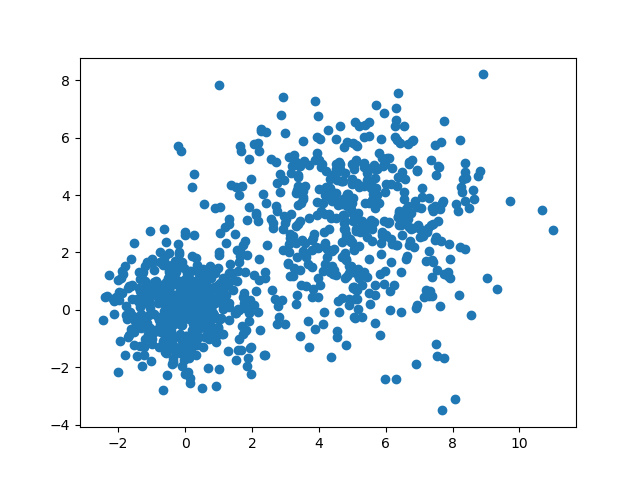

In [3]:
plt.figure()
plt.scatter(X[:,0], X[:,1])

In [6]:
# For fun: Let's pick some random (and good) cluster colors
import random

clusterColors = np.random.rand(K, 3) # Picking random colors for each cluster.
varsSoFar = np.var(clusterColors, axis=0) # Should be 1 x 2 of the variance of each column.

for i in range(3*K):
    tempColors = np.random.rand(K, 3) #Picking K random colors
    vartemp = np.var(tempColors, axis=0)
    if np.all(vartemp > varsSoFar):
        clusterColors = tempColors
        varsSoFar = vartemp

In [7]:
# K-means: initialization
# pick K initial cluster centers.
# whichinit = random.randint(0, len(X), size=(K,)) # Could generate repeats.
whichinit = random.choice(len(X), size=K, replace=False)
CC = X[whichinit, :].copy() # Cluster Centers

CC_init = CC.copy()

TypeError: Random.choice() got an unexpected keyword argument 'size'

In [ ]:
CC

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c='gray', alpha=.5)
plt.scatter(CC[:,0], CC[:,1], s=30, c=clusterColors)

In [ ]:
# K-means: compute: for every data point determine which center is closest.
# Need some magic function that computes the distance between every row of X
# (the points) and every row of CC (the clusters).
D = cdist(X, CC, 'euclidean')
# D should be NUMPOINTS x K

whichCluster = np.argmin(D, axis=1) # NUMPOINTS x 1 of which center was closest

In [ ]:
D[:10,:]

In [ ]:
X[0,:]

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=clusterColors[whichCluster], alpha=.5)

In [ ]:
# K-means: recompute the cluster centers as the mean of the data in each cluster
for c in range(K):
    CC[c,:] = np.mean(X[whichCluster == c, :], axis=0) # average of just those that were closest to c.

In [ ]:
np.mean(X[whichCluster == 0, :],axis=0)

In [ ]:
(whichCluster == 1).sum()

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c='gray', alpha=.5)
plt.scatter(CC[:,0], CC[:,1], s=30, c=clusterColors)

In [ ]:
# K-means: compute: for every data point determine which center is closest.
# Need some magic function that computes the distance between every row of X
# (the points) and every row of CC (the clusters).
D = cdist(X, CC, 'euclidean')
# D should be NUMPOINTS x K

whichCluster = np.argmin(D, axis=1) # NUMPOINTS x 1 of which center was closest

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=clusterColors[whichCluster], alpha=.5)

In [ ]:
f, ax = plt.subplots(1,3, figsize=(9,3), sharex=True, sharey=True)
ax[0].scatter(X[:,0], X[:,1], c='gray', s=20)
ax[0].set_title('Original Data')


ax[1].scatter(X[:,0], X[:,1], c='gray', alpha=.5, s=20)
ax[1].scatter(CC_init[:,0], CC_init[:,1], c=clusterColors, s=50)
ax[1].set_title('Initial Cluster Centers')






pointColors = clusterColors[whichCluster]
clusterEdgeColors = 1 - clusterColors # for contrast, make the cluster center edges opposite.

ax[2].scatter(X[:,0], X[:,1], c=pointColors, alpha=.5, s=20)
ax[2].scatter(CC[:,0], CC[:,1], c=clusterColors, edgecolors=clusterEdgeColors, s=50)
ax[2].set_title('Recomputed Clusters')